# House Pricing Model Prediction

Importing Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


Importing dataset

In [58]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [59]:
print(housing.keys)

<built-in method keys of Bunch object at 0x000001D70D9835E0>


In [60]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Converting into pandas dataframe (outside project work)

In [61]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MEDV'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [62]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [63]:
data = housing.data
target = housing.target
from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(data, target, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)


In [65]:
np.random.seed(42)
tf.random.set_seed(42)

In [66]:
x_train.shape

(11610, 8)

In [67]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

Summary of model created

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


Compiling the model

In [69]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["mae"])

c:\Users\Sahib Preet Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [70]:
x_valid.shape

(3870, 8)

In [71]:
model_history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid,y_valid))

Epoch 1/30


363/363 [==============================] - 3s 3ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4709 - mae:

In [72]:
mae_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3727 - mae: 0.4346


In [73]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577126979827881,
  0.593418538570404,
  0.5557191371917725,
  0.5271905064582825,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779937505722046,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.42605164647102356,
  0.42017653584480286,
  0.41549986600875854,
  0.41116511821746826,
  0.4077068567276001,
  0.40395283699035645,
  0.4004494547843933,
  0.39796027541160583,
  0.394916296005249,
  0.3923809230327606,
  0.38980725407600403,
  0.3874099552631378,
  0.3850752115249634,
  0.38291803002357483,
  0.3808581829071045,
  0.37875914573669434,
  0.3769364356994629,
  0.37497687339782715],
 'mae': [0.9900256991386414,
  0.6041509509086609,
  0.5618005990982056,
  0.5398454070091248,
  0.5237293243408203,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.4797375202178955,
  0.4744163453578949,
  0.4703480303287506,
  0.46740883588790894,
  0.4636021554470062,
  0.

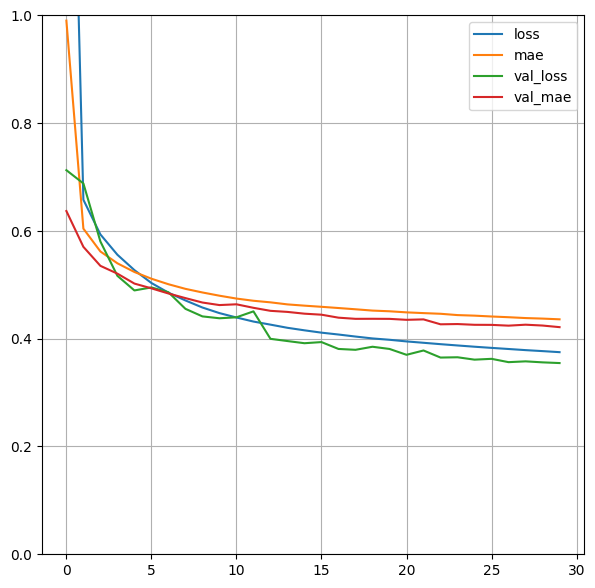

In [74]:
pd.DataFrame(model_history.history).plot(figsize=(7,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [75]:
x_new = x_test[10:15]
y_pred = model.predict(x_new)
print(y_pred)
print(y_test[10:15])

[[0.7952126]
 [1.9871078]
 [1.4429836]
 [1.9661204]
 [2.482309 ]]
[1.232 2.539 2.151 2.205 2.198]


Till now we have used Sequential API but not all neural networks are simply sequential. 
Some may have multiple inputs, multiple outputs, or may even have internal branching between layers.
For these cases, it is best to use the functional API, which allows us to build arbitrary graphs of layers.

**Functional API** is flexible and performs better at these situations

In [76]:
# Deleting the model 
del model

In [77]:
# Clearing sessions and free resources
keras.backend.clear_session()

In [84]:
input_ = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [85]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           270         input_7[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           930         dense_11[0][0]                   
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 38)           0           input_7[0][0]                    
                                                                 dense_12[0][0]               

In [86]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["mae"])


c:\Users\Sahib Preet Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [91]:
model_history = model.fit(x_train, y_train, epochs=50, validation_data=(x_valid, y_valid))

Epoch 1/50
  1/363 [..............................] - ETA: 3s - loss: 0.4469 - mae: 0.5087

363/363 [==============================] - 2s 7ms/step - loss: 0.3609 - mae: 0.4290 - val_loss: 0.3457 - val_mae: 0.4198
Epoch 2/50
363/363 [==============================] - 3s 7ms/step - loss: 0.3601 - mae: 0.4283 - val_loss: 0.3731 - val_mae: 0.4253
Epoch 3/50
363/363 [==============================] - 2s 6ms/step - loss: 0.3596 - mae: 0.4283 - val_loss: 0.3531 - val_mae: 0.4201
Epoch 4/50
363/363 [==============================] - 2s 5ms/step - loss: 0.3590 - mae: 0.4276 - val_loss: 0.3421 - val_mae: 0.4204
Epoch 5/50
363/363 [==============================] - 2s 5ms/step - loss: 0.3581 - mae: 0.4271 - val_loss: 0.3405 - val_mae: 0.4191
Epoch 6/50
363/363 [==============================] - 1s 4ms/step - loss: 0.3575 - mae: 0.4269 - val_loss: 0.3457 - val_mae: 0.4179
Epoch 7/50
363/363 [==============================] - 2s 4ms/step - loss: 0.3568 - mae: 0.4258 - val_loss: 0.3440 - val_mae: 0.4198
Epoch 8/50
363/363 [==============================] - 2s 4ms/step - loss: 0.3564 - mae:

In [92]:
mae_test = model.evaluate(x_test, y_test)

 18/162 [==>...........................] - ETA: 0s - loss: 0.3125 - mae: 0.3938

162/162 [==============================] - 1s 4ms/step - loss: 0.3398 - mae: 0.4121


In [93]:
model_history.history

{'loss': [0.36085623502731323,
  0.36007651686668396,
  0.35958582162857056,
  0.3590329587459564,
  0.35810449719429016,
  0.357494056224823,
  0.35680264234542847,
  0.35637667775154114,
  0.3556036353111267,
  0.35498660802841187,
  0.3548186719417572,
  0.3538658618927002,
  0.35404205322265625,
  0.3530091345310211,
  0.3523104786872864,
  0.352076917886734,
  0.35151195526123047,
  0.351168692111969,
  0.3502129018306732,
  0.350093275308609,
  0.3497583270072937,
  0.3490089178085327,
  0.3490450978279114,
  0.3483249843120575,
  0.3479177951812744,
  0.3474009931087494,
  0.3473019301891327,
  0.34682518243789673,
  0.3465800881385803,
  0.34575530886650085,
  0.3457725942134857,
  0.34498366713523865,
  0.3451001048088074,
  0.344307005405426,
  0.344095379114151,
  0.3439285159111023,
  0.3433476686477661,
  0.34302881360054016,
  0.34285011887550354,
  0.3423556387424469,
  0.34213072061538696,
  0.3417592942714691,
  0.34114140272140503,
  0.34111881256103516,
  0.340818434

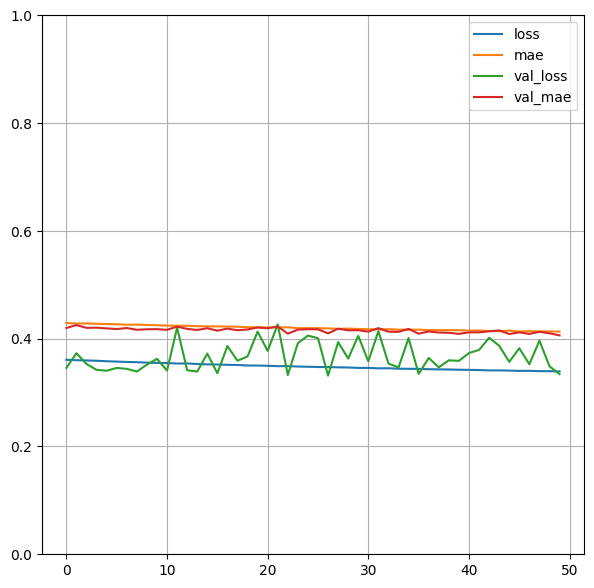

In [94]:
pd.DataFrame(model_history.history).plot(figsize=(7,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### SAVING AND RESTORING OF MODEL

In [95]:
model.save("My_DL_Model.h5")


In [96]:
%pwd

'c:\\python\\Deep_Learning_Internshala'

In [97]:
# To change directory
# %cd C:\\..path


In [98]:
del model

In [99]:
keras.backend.clear_session()

In [100]:
model = keras.models.load_model("My_DL_Model.h5")

In [101]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           270         input_7[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           930         dense_11[0][0]                   
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 38)           0           input_7[0][0]                    
                                                                 dense_12[0][0]               

In [102]:
y_pred = model.predict(x_new)
print(y_pred)

[[0.91612947]
 [1.8635883 ]
 [1.4460928 ]
 [1.7728707 ]
 [2.5458283 ]]


### Using CALLBACKS DURING TRAINING 
- Callbacks are functions that can be applied at certain stages of the training process, such as at the end of each epoch.
- The keras.callbacks module includes several built-in callbacks, and the API allows you to create your own custom callbacks.

In [103]:
del model
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [105]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [107]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [108]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [109]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid), 
                    callbacks=[checkpoint_cb])

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/20
363/363 [==============================] - 2s 7ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4474 - val_loss: 0.4379

In [110]:
del model
keras.backend.clear_session()

In [111]:
model = keras.models.load_model("Model-10.h5")

In [112]:
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.4382


### BEST MODEL ONLY

In [113]:
del model
keras.backend.clear_session()


In [114]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [115]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

c:\Users\Sahib Preet Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [116]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [117]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid), 
                    callbacks=[checkpoint_cb])

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 1.4581 - val_loss: 0.7883
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.7368 - val_loss: 0.7306
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.6516 - val_loss: 0.6501
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5951 - val_loss: 0.5551
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5536 - val_loss: 0.5025
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5199 - val_loss: 0.4728
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4940 - val_loss: 0.4497
Epoch 8/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4730 - val_loss: 0.4359
Epoch 9/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4563 - val_loss: 0.4267
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4431 - val_loss: 0.4224

In [118]:
model = keras.models.load_model("Best_Model.h5")

In [119]:
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.4366


#### Early Stopping Checkpoint

In [120]:
del model
keras.backend.clear_session()


In [121]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [122]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

c:\Users\Sahib Preet Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [123]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("EarlyStop_Model.h5", save_best_only=True)

patience refers to no. of epochs with no improvement after which training will be stopped

In [124]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [126]:
history = model.fit(x_train, y_train, epochs=200, validation_data=(x_valid, y_valid), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/200
 32/363 [=>............................] - ETA: 1s - loss: 1.7154

363/363 [==============================] - 5s 15ms/step - loss: 1.2511 - val_loss: 0.9276
Epoch 2/200
363/363 [==============================] - 2s 6ms/step - loss: 0.8812 - val_loss: 0.9845
Epoch 3/200
363/363 [==============================] - 2s 4ms/step - loss: 0.7858 - val_loss: 0.8563
Epoch 4/200
363/363 [==============================] - 1s 4ms/step - loss: 0.7331 - val_loss: 0.7049
Epoch 5/200
363/363 [==============================] - 2s 4ms/step - loss: 0.6926 - val_loss: 0.6415
Epoch 6/200
363/363 [==============================] - 2s 6ms/step - loss: 0.6566 - val_loss: 0.6274
Epoch 7/200
363/363 [==============================] - 2s 5ms/step - loss: 0.6260 - val_loss: 0.6162
Epoch 8/200
363/363 [==============================] - 3s 8ms/step - loss: 0.5987 - val_loss: 0.5528
Epoch 9/200
363/363 [==============================] - 3s 8ms/step - loss: 0.5725 - val_loss: 0.5358
Epoch 10/200
363/363 [==============================] - 4s 10ms/step - loss: 0.5491 - val_loss: 0.5360

In [128]:
model = keras.models.load_model("EarlyStop_Model.h5")
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3478


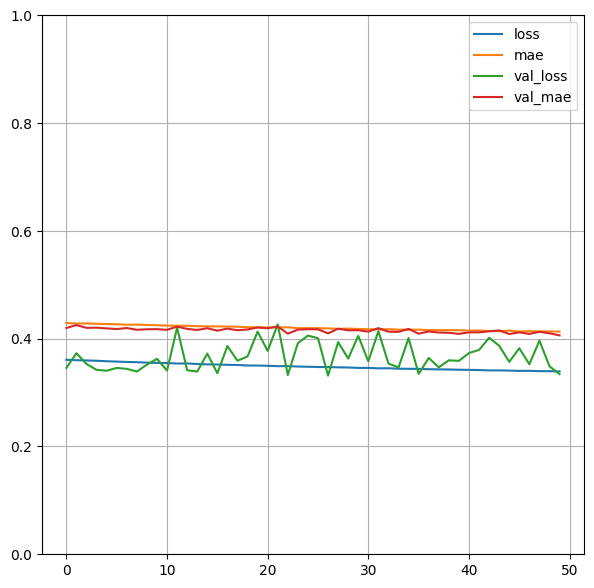

In [129]:
pd.DataFrame(model_history.history).plot(figsize=(7,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Hyperparameters

Preferable Considerations
--------------------------
*   **learning_rate** = 0.001
*   **batch_size** = 32
*   **num_epochs** = 10

set a large value for epochs and use early stopping callback is one advise